# Multivariate Gaussian Mixture Intution
This Notebooks is about Multivariate Gaussian Mixture. We will generetate some Multivariate Gaussians and then create a mixture of them. This will help us visualise the distibution of the gaussian and then the mixture. 

We will only create 2-D gaussians because it will not be possible to visualise 3-D+ gaussians.

In [76]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Create Gaussians

In [77]:
class Gaussian :
    def __init__(self, Mu, Sigma, D, lamda = 1):
        self.Mu = Mu
        self.Sigma = Sigma
        self.D = D
        self.lamda = lamda
        

    def probability(self, X):
        assert X.shape[0] == self.D
        normalising_factor = 1 / (((2 * np.pi) ** (self.D / 2)) * (np.linalg.det(self.Sigma) ** (1 / 2)))
        exponent = -0.5 * np.dot(np.dot((self.Mu - X), np.linalg.inv(self.Sigma)), (self.Mu - X).T)
        return normalising_factor * np.exp(exponent) * self.lamda

In [78]:
def generateCountour (Mu, Sigma, D, lamda = 1.0, n_samples = 100):
    """
    Generates data for contour plot of the Gaussian distribution
    Args:
        Mu: Means of the Gaussian distribution
        Sigma: Covariance matrix of the Gaussian distribution
        D: Dimension of the Gaussian distribution
        n_samples: Number of samples to generate
    Returns:
        X: Generated samples
        Z: Generated samples projected onto the contour plot

    """
    # create points from mean - 3*Sigma to mean + 3*Sigma
    x1 = np.linspace(Mu[0] - 3 * Sigma[0][0], Mu[0] + 3 * Sigma[0][0], n_samples)
    x2 = np.linspace(Mu[1] - 3 * Sigma[1][1], Mu[1] + 3 * Sigma[1][1], n_samples)
    X1, X2 = np.meshgrid(x1, x2)
   
    Z = np.zeros((n_samples, n_samples))
    gaussian = Gaussian(Mu, Sigma, D, lamda = lamda)
    for i in range(n_samples):
        for j in range(n_samples):
            X = np.array([X1[i][j], X2[i][j]])
            Z[i][j] = gaussian.probability(X)
    return X1, X2, Z


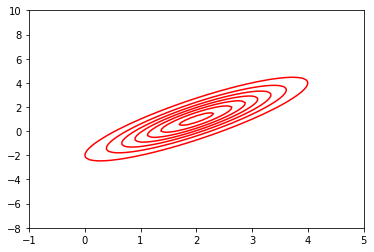

In [79]:
X1, X2,  Z = generateCountour(np.array([2, 1]), np.array([[1, 1.5], [1.5, 3]]), 2)
plt.contour(X1, X2, Z, colors='r')
plt.show()

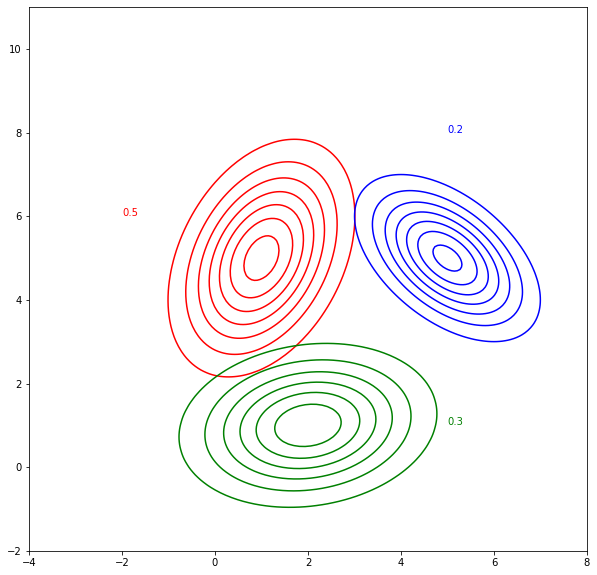

In [97]:
# lets generate 3 gaussians with nearby means and different covariance matrices
lamdas = [0.5, 0.3, 0.2]
X11, X12, Z1 = generateCountour(np.array([1, 5]), np.array([[1, 0.5], [0.5, 2]]), 2, lamdas[0])
X21, X22, Z2 = generateCountour(np.array([2, 1]), np.array([[2, 0.2], [0.2, 1]]), 2, lamdas[1])
X31, X32, Z3 = generateCountour(np.array([5, 5]), np.array([[1, -0.5], [-0.5, 1]]), 2, lamdas[2])

# set size of the figure
plt.figure(figsize=(10, 10))
# plot them on the same plot
plt.contour(X11, X12, Z1, colors='r', )
plt.contour(X21, X22, Z2, colors='g')
plt.contour(X31, X32, Z3, colors='b')
# mrite the lambda values
plt.text(-2, 6,  str(lamdas[0]), color='r')
plt.text(5, 1, str(lamdas[1]), color='g')
plt.text(5, 8,  str(lamdas[2]), color='b')

plt.show()


In [89]:
class GaussianMixture:
    def __init__(self, gaussians):
        self.gaussians = gaussians
        self.N = len(gaussians)
    
    def probability(self, X):
        """
        Calculates the probability of the data X belonging to the mixture of Gaussians
        Args:
            X: Data to be classified
        Returns:
            Probability of the data belonging to the mixture of Gaussians
        """
        assert X.shape[0] == self.gaussians[0].D
        probabilities = np.zeros(self.N)
        for i in range(self.N):
            probabilities[i] = self.gaussians[i].probability(X)*self.gaussians[i].lamda
        return np.sum(probabilities) 
        

In [90]:
def generateCountourMixture(MuArray, SigmaArray, D,  lamdas, n_samples):
    
    # find the x1min, x1max, x2min, x2max based on the means and covariances
    x1min = np.min(MuArray[:, 0] - 3 * SigmaArray[:, 0, 0])
    x1max = np.max(MuArray[:, 0] + 3 * SigmaArray[:, 0, 0])
    x2min = np.min(MuArray[:, 1] - 3 * SigmaArray[:, 1, 1])
    x2max = np.max(MuArray[:, 1] + 3 * SigmaArray[:, 1, 1])
    # create points from mean - 3*Sigma to mean + 3*Sigma
    x1 = np.linspace(x1min, x1max, n_samples)
    x2 = np.linspace(x2min, x2max, n_samples)
    X1, X2 = np.meshgrid(x1, x2)

    # create mixture of gaussians
    mixture = GaussianMixture([Gaussian(Mu, Sigma, D, lamda) for Mu, Sigma, lamda in zip(MuArray, SigmaArray, lamdas)])
    Z = np.zeros((n_samples, n_samples))

    for i in range(n_samples):
        for j in range(n_samples):
            X = np.array([X1[i][j], X2[i][j]])
            Z[i][j] = mixture.probability(X)
    return X1, X2, Z
    
    

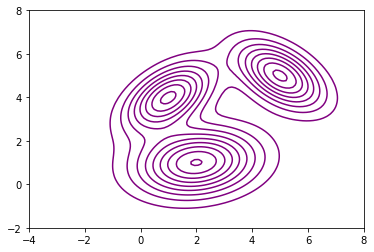

In [109]:
Means = np.array([[1, 4], [2, 1], [5, 5]])
Sigmas = np.array([[[1, 0.5], [0.5, 1]], [[2, 0.2], [0.2, 1]], [[1, -0.5], [-0.5, 1]]])
X1, X2, Z = generateCountourMixture(Means, Sigmas, 2, [0.3, 0.4, 0.3], 100)
plt.contour(X1, X2, Z, colors='purple', levels = 10)
plt.show()
